In [1]:
import numpy as np    # linear algebra
import pandas as pd   # data processing; CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting library , for simple plots
import seaborn as sns # ploting utility
from sklearn.metrics import confusion_matrix # to plot heatmaps

import os 
for dirname, _, filenames in os.walk('Data/Prostate_Cancer.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
prostate_cancer_df = pd.read_csv("Data/Prostate_Cancer.csv")

In [3]:
prostate_cancer_df.shape
# There are 100 rows with 10 columns

(100, 10)

In [4]:
prostate_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [5]:
prostate_cancer_df.isnull().sum()
# We can clearly see that there  is no unfilled columnb


id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [6]:
prostate_cancer_df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [7]:
prostate_cancer_df.head(15)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [8]:
# Since we don't need id column , we can drop it safely!
prostate_cancer_df.drop(["id"], axis=1, inplace=True)
prostate_cancer_df.head(15)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


In [9]:
# we are going to do classification on diagnosis_result column, so  we are converting them into integer values
#1 to M and 0 to B using list comprehension method

prostate_cancer_df["diagnosis_result"] = [1 if element == "M" else 0 for element in prostate_cancer_df["diagnosis_result"]]
prostate_cancer_df.head(15)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
5,0,25,25,83,477,0.128,0.170,0.209,0.076
6,1,16,26,120,1040,0.095,0.109,0.179,0.057
7,1,15,18,90,578,0.119,0.165,0.220,0.075
8,1,19,24,88,520,0.127,0.193,0.235,0.074
9,1,25,11,84,476,0.119,0.240,0.203,0.082


In [10]:
prostate_cancer_df["diagnosis_result"].value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

In [11]:
# we need to split the data into train-test values

x = prostate_cancer_df.drop(["diagnosis_result"], axis=1)
y = prostate_cancer_df["diagnosis_result"].values

In [12]:
# Observing our values
x.head(15)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
5,25,25,83,477,0.128,0.170,0.209,0.076
6,16,26,120,1040,0.095,0.109,0.179,0.057
7,15,18,90,578,0.119,0.165,0.220,0.075
8,19,24,88,520,0.127,0.193,0.235,0.074
9,25,11,84,476,0.119,0.240,0.203,0.082


In [13]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [14]:
# Splitting the data into train-test values
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, train_size=0.75, random_state=42)
# 25% is test data, 75% is train data

# We can change the test and train sizes in order to see the differences. Use floats. 
clf_names = [] 
clf_scores = []

# At the end we are going to compare all the methods that we used.

In [15]:
x_train

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
15,22,19,97,659,0.114,0.160,0.230,0.071
40,24,16,86,563,0.082,0.060,0.178,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
9,25,11,84,476,0.119,0.240,0.203,0.082
72,21,12,114,929,0.107,0.183,0.193,0.065
...,...,...,...,...,...,...,...,...
60,15,18,65,312,0.113,0.081,0.274,0.070
71,9,26,59,244,0.098,0.153,0.190,0.090
14,12,13,94,578,0.113,0.229,0.207,0.077
92,14,14,85,552,0.074,0.051,0.139,0.053


KNN Test Accuracy with n = 5: 0.8


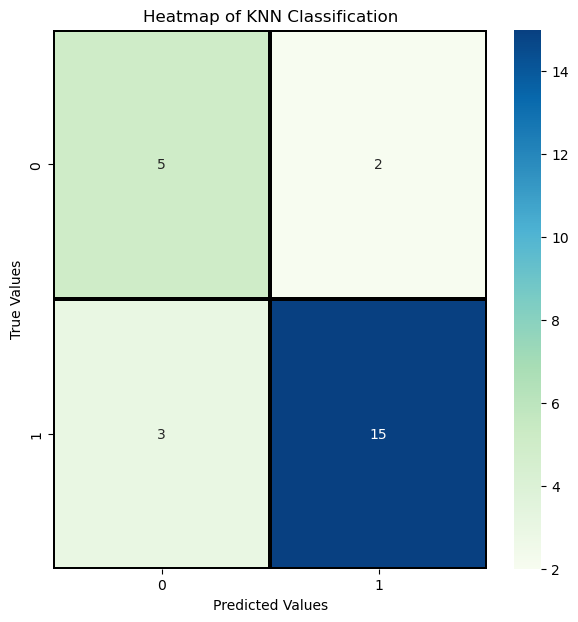

In [16]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # 5 is default.
knn.fit(x_train,y_train) # Fitting
print("KNN Test Accuracy with n = 5: {}".format(knn.score(x_test,y_test)))
clf_names.append("KNN")
clf_scores.append(knn.score(x_test,y_test))

# Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)



# Visualization Confusion Matrix
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,linewidths=1.5,linecolor="#000000",fmt=".0f",ax=ax, cmap="GnBu")
plt.title("Heatmap of KNN Classification")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

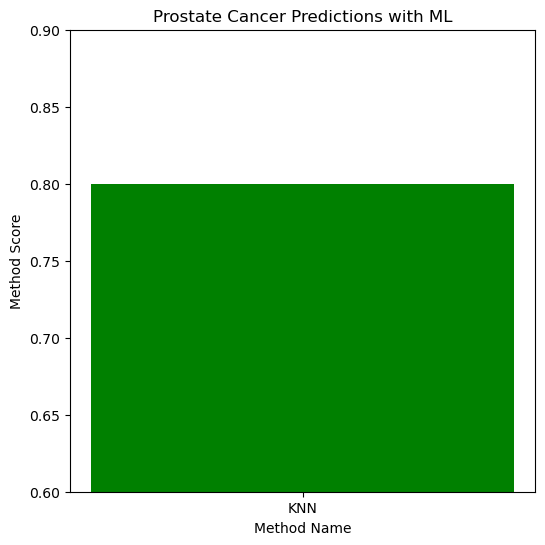

In [17]:
fig = plt.figure(figsize=(6,6))
plt.bar(clf_names, clf_scores, color = "Green", width = 0.1)
plt.ylim(0.6, 0.9)
plt.title("Prostate Cancer Predictions with ML")
plt.xlabel("Method Name")
plt.ylabel("Method Score")
plt.savefig("25test75train.png")
#plt.savefig("20test80train.png")
#plt.savefig("30test70train.png")